In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379047, 30)
After OverSampling, the shape of train_y: (379047,) 

After OverSampling, counts of label '1': 189504
After OverSampling, counts of label '0': 189543
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

379047/379047 [==============================] - 22s 58us/step - loss: 12.6090 - rec_loss: 20.0536 - kl_loss: 4.0442 - val_loss: 13.3855 - val_rec_loss: 23.5811 - val_kl_loss: 2.6526
Epoch 17/150
379047/379047 [==============================] - 22s 58us/step - loss: 12.5274 - rec_loss: 19.9179 - kl_loss: 4.0382 - val_loss: 13.4928 - val_rec_loss: 23.7124 - val_kl_loss: 2.7617
Epoch 18/150
379047/379047 [==============================] - 22s 59us/step - loss: 12.4966 - rec_loss: 19.8807 - kl_loss: 4.0429 - val_loss: 13.3721 - val_rec_loss: 23.4202 - val_kl_loss: 2.8220
Epoch 19/150
379047/379047 [==============================] - 22s 58us/step - loss: 12.4655 - rec_loss: 19.8188 - kl_loss: 4.0466 - val_loss: 13.4092 - val_rec_loss: 23.6386 - val_kl_loss: 2.6828
Epoch 20/150
379047/379047 [==============================] - 22s 58us/step - loss: 12.4252 - rec_loss: 19.7601 - kl_loss: 4.0518 - val_loss: 13.9062 - val_rec_loss: 24.5780 - val_kl_loss: 2.7430
Epoch 21/150
379047/379047 [=====

Epoch 58/150
379047/379047 [==============================] - 21s 56us/step - loss: 12.1169 - rec_loss: 19.1301 - kl_loss: 4.2102 - val_loss: 13.4991 - val_rec_loss: 23.6422 - val_kl_loss: 2.9006
Epoch 59/150
379047/379047 [==============================] - 21s 56us/step - loss: 12.0602 - rec_loss: 19.0205 - kl_loss: 4.2046 - val_loss: 13.1492 - val_rec_loss: 22.9108 - val_kl_loss: 2.9323
Epoch 60/150
379047/379047 [==============================] - 22s 57us/step - loss: 12.0927 - rec_loss: 19.0910 - kl_loss: 4.2011 - val_loss: 13.4284 - val_rec_loss: 23.4648 - val_kl_loss: 2.9307
Epoch 61/150
379047/379047 [==============================] - 21s 56us/step - loss: 12.0995 - rec_loss: 19.0894 - kl_loss: 4.2070 - val_loss: 13.2276 - val_rec_loss: 23.0124 - val_kl_loss: 2.9678
Epoch 62/150
379047/379047 [==============================] - 21s 56us/step - loss: 12.1139 - rec_loss: 19.1016 - kl_loss: 4.2138 - val_loss: 13.1398 - val_rec_loss: 22.9098 - val_kl_loss: 2.9276
Epoch 63/150
379047/

Epoch 100/150
379047/379047 [==============================] - 23s 60us/step - loss: 11.9034 - rec_loss: 18.6519 - kl_loss: 4.2384 - val_loss: 13.6521 - val_rec_loss: 23.9360 - val_kl_loss: 2.9025
Epoch 101/150
379047/379047 [==============================] - 23s 61us/step - loss: 11.8775 - rec_loss: 18.5769 - kl_loss: 4.2537 - val_loss: 13.1781 - val_rec_loss: 22.9560 - val_kl_loss: 2.9288
Epoch 102/150
379047/379047 [==============================] - 23s 60us/step - loss: 11.8664 - rec_loss: 18.5667 - kl_loss: 4.2442 - val_loss: 13.3557 - val_rec_loss: 23.3043 - val_kl_loss: 2.9438
Epoch 103/150
379047/379047 [==============================] - 23s 61us/step - loss: 11.8508 - rec_loss: 18.5432 - kl_loss: 4.2434 - val_loss: 12.9950 - val_rec_loss: 22.7116 - val_kl_loss: 2.8078
Epoch 104/150
379047/379047 [==============================] - 23s 61us/step - loss: 11.8903 - rec_loss: 18.6007 - kl_loss: 4.2583 - val_loss: 13.2463 - val_rec_loss: 23.0415 - val_kl_loss: 2.9669
Epoch 105/150
3

379047/379047 [==============================] - 23s 60us/step - loss: 11.8266 - rec_loss: 18.4878 - kl_loss: 4.2640 - val_loss: 14.1185 - val_rec_loss: 24.8657 - val_kl_loss: 2.9178
Epoch 142/150
379047/379047 [==============================] - 23s 60us/step - loss: 11.8650 - rec_loss: 18.5506 - kl_loss: 4.2634 - val_loss: 13.5057 - val_rec_loss: 23.6196 - val_kl_loss: 2.9374
Epoch 143/150
379047/379047 [==============================] - 23s 60us/step - loss: 11.8751 - rec_loss: 18.5597 - kl_loss: 4.2728 - val_loss: 13.8486 - val_rec_loss: 24.2385 - val_kl_loss: 2.9849
Epoch 144/150
379047/379047 [==============================] - 23s 60us/step - loss: 11.8726 - rec_loss: 18.5617 - kl_loss: 4.2653 - val_loss: 13.1281 - val_rec_loss: 22.9735 - val_kl_loss: 2.8315
Epoch 145/150
379047/379047 [==============================] - 23s 61us/step - loss: 11.8324 - rec_loss: 18.4970 - kl_loss: 4.2619 - val_loss: 13.2086 - val_rec_loss: 23.1004 - val_kl_loss: 2.8698
Epoch 146/150
379047/379047 [

379047/379047 [==============================] - 80s 210us/step - loss: 0.3120 - accuracy: 0.8716 - val_loss: 0.2715 - val_accuracy: 0.8811
Epoch 42/50
379047/379047 [==============================] - 80s 210us/step - loss: 0.3120 - accuracy: 0.8712 - val_loss: 0.2795 - val_accuracy: 0.8767
Epoch 43/50
379047/379047 [==============================] - 80s 210us/step - loss: 0.3120 - accuracy: 0.8712 - val_loss: 0.2778 - val_accuracy: 0.8776
Epoch 44/50
379047/379047 [==============================] - 80s 211us/step - loss: 0.3118 - accuracy: 0.8712 - val_loss: 0.2746 - val_accuracy: 0.8789
Epoch 45/50
379047/379047 [==============================] - 80s 212us/step - loss: 0.3111 - accuracy: 0.8717 - val_loss: 0.2673 - val_accuracy: 0.8793
Epoch 46/50
379047/379047 [==============================] - 80s 210us/step - loss: 0.3111 - accuracy: 0.8718 - val_loss: 0.2628 - val_accuracy: 0.8831
Epoch 47/50
379047/379047 [==============================] - 79s 207us/step - loss: 0.3112 - accurac

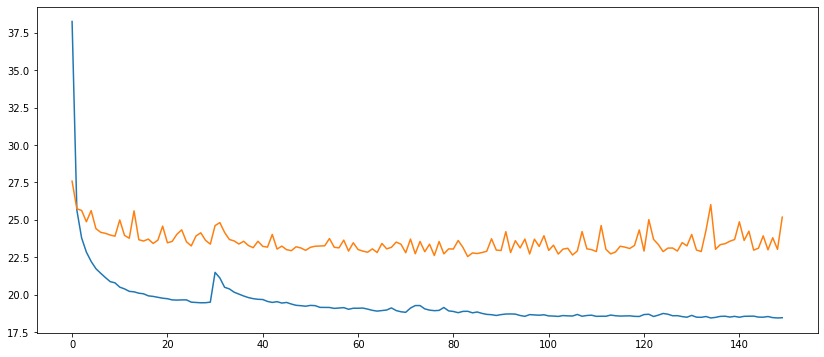

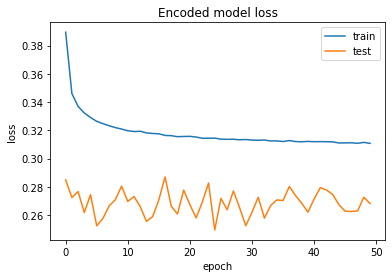

Overall accuracy of Convolutional Neural Network model: 0.8829211258110727


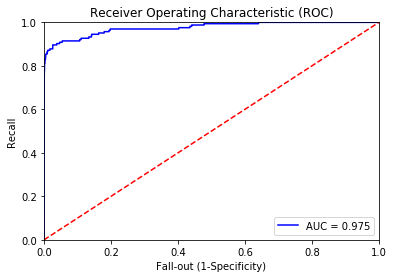

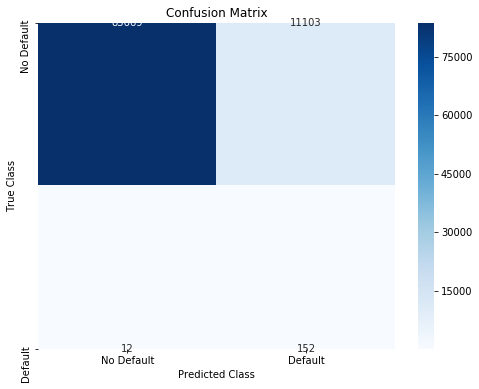

AUC(ROC): 0.9048372062140406
Precision: 0.013505108840515326
Recall: 0.926829268292683
F1 score: 0.026622296173044922
False positives: 11103
True positives: 152
False negatives: 12
True negatives: 83669
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379111, 30)
After OverSampling, the shape of train_y: (379111,) 

After OverSampling, counts of label '1': 189568
After OverSampling, counts of label '0': 189543
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

379111/379111 [==============================] - 23s 61us/step - loss: 12.4032 - rec_loss: 19.7831 - kl_loss: 3.9932 - val_loss: 13.1588 - val_rec_loss: 22.9151 - val_kl_loss: 2.8796
Epoch 17/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.3483 - rec_loss: 19.6730 - kl_loss: 4.0015 - val_loss: 12.8574 - val_rec_loss: 22.3218 - val_kl_loss: 2.8681
Epoch 18/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.3185 - rec_loss: 19.6022 - kl_loss: 4.0102 - val_loss: 12.8785 - val_rec_loss: 22.3481 - val_kl_loss: 2.8821
Epoch 19/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.3404 - rec_loss: 19.6506 - kl_loss: 4.0093 - val_loss: 13.0865 - val_rec_loss: 22.8222 - val_kl_loss: 2.8302
Epoch 20/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.2470 - rec_loss: 19.4537 - kl_loss: 4.0279 - val_loss: 12.9009 - val_rec_loss: 22.3967 - val_kl_loss: 2.8698
Epoch 21/150
379111/379111 [=====

Epoch 58/150
379111/379111 [==============================] - 23s 60us/step - loss: 11.8710 - rec_loss: 18.6370 - kl_loss: 4.1720 - val_loss: 12.6472 - val_rec_loss: 21.7132 - val_kl_loss: 3.0253
Epoch 59/150
379111/379111 [==============================] - 23s 60us/step - loss: 11.8933 - rec_loss: 18.6546 - kl_loss: 4.2005 - val_loss: 12.6429 - val_rec_loss: 21.6684 - val_kl_loss: 3.0603
Epoch 60/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.0930 - rec_loss: 19.0310 - kl_loss: 4.2026 - val_loss: 12.8648 - val_rec_loss: 22.1392 - val_kl_loss: 3.0251
Epoch 61/150
379111/379111 [==============================] - 23s 60us/step - loss: 11.9105 - rec_loss: 18.7449 - kl_loss: 4.1427 - val_loss: 12.8138 - val_rec_loss: 22.0753 - val_kl_loss: 3.0080
Epoch 62/150
379111/379111 [==============================] - 23s 61us/step - loss: 11.9688 - rec_loss: 18.8611 - kl_loss: 4.1535 - val_loss: 12.6963 - val_rec_loss: 21.9568 - val_kl_loss: 2.8903
Epoch 63/150
379111/

Epoch 100/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.6672 - rec_loss: 20.1707 - kl_loss: 4.1705 - val_loss: 12.9028 - val_rec_loss: 22.2451 - val_kl_loss: 2.9786
Epoch 101/150
379111/379111 [==============================] - 23s 62us/step - loss: 12.6227 - rec_loss: 20.0639 - kl_loss: 4.1828 - val_loss: 13.0447 - val_rec_loss: 22.4934 - val_kl_loss: 2.9897
Epoch 102/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.6035 - rec_loss: 20.0414 - kl_loss: 4.1716 - val_loss: 12.9675 - val_rec_loss: 22.3283 - val_kl_loss: 3.0418
Epoch 103/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.7028 - rec_loss: 20.2885 - kl_loss: 4.1648 - val_loss: 12.9847 - val_rec_loss: 22.3388 - val_kl_loss: 3.0913
Epoch 104/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.6848 - rec_loss: 20.2247 - kl_loss: 4.2024 - val_loss: 12.7181 - val_rec_loss: 21.8874 - val_kl_loss: 3.0211
Epoch 105/150
3

379111/379111 [==============================] - 23s 60us/step - loss: 12.2886 - rec_loss: 19.6199 - kl_loss: 4.1161 - val_loss: 12.5796 - val_rec_loss: 21.8002 - val_kl_loss: 2.9139
Epoch 142/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.2412 - rec_loss: 19.5294 - kl_loss: 4.1136 - val_loss: 12.6592 - val_rec_loss: 21.9473 - val_kl_loss: 2.9275
Epoch 143/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.2224 - rec_loss: 19.4777 - kl_loss: 4.1250 - val_loss: 12.6230 - val_rec_loss: 21.8877 - val_kl_loss: 2.9213
Epoch 144/150
379111/379111 [==============================] - 23s 61us/step - loss: 12.1706 - rec_loss: 19.3797 - kl_loss: 4.1317 - val_loss: 12.5344 - val_rec_loss: 21.6546 - val_kl_loss: 2.9757
Epoch 145/150
379111/379111 [==============================] - 23s 60us/step - loss: 12.0820 - rec_loss: 19.1965 - kl_loss: 4.1283 - val_loss: 12.6179 - val_rec_loss: 21.8755 - val_kl_loss: 2.9103
Epoch 146/150
379111/379111 [

Epoch 42/50
379111/379111 [==============================] - 83s 219us/step - loss: 0.3215 - accuracy: 0.8579 - val_loss: 0.2838 - val_accuracy: 0.8630
Epoch 43/50
379111/379111 [==============================] - 80s 210us/step - loss: 0.3223 - accuracy: 0.8579 - val_loss: 0.2875 - val_accuracy: 0.8677
Epoch 44/50
379111/379111 [==============================] - 79s 209us/step - loss: 0.3221 - accuracy: 0.8580 - val_loss: 0.2732 - val_accuracy: 0.8691
Epoch 45/50
379111/379111 [==============================] - 84s 221us/step - loss: 0.3221 - accuracy: 0.8572 - val_loss: 0.2820 - val_accuracy: 0.8607
Epoch 46/50
379111/379111 [==============================] - 84s 222us/step - loss: 0.3218 - accuracy: 0.8580 - val_loss: 0.2820 - val_accuracy: 0.8638
Epoch 47/50
379111/379111 [==============================] - 85s 224us/step - loss: 0.3217 - accuracy: 0.8578 - val_loss: 0.2861 - val_accuracy: 0.8639
Epoch 48/50
379111/379111 [==============================] - 85s 224us/step - loss: 0.32

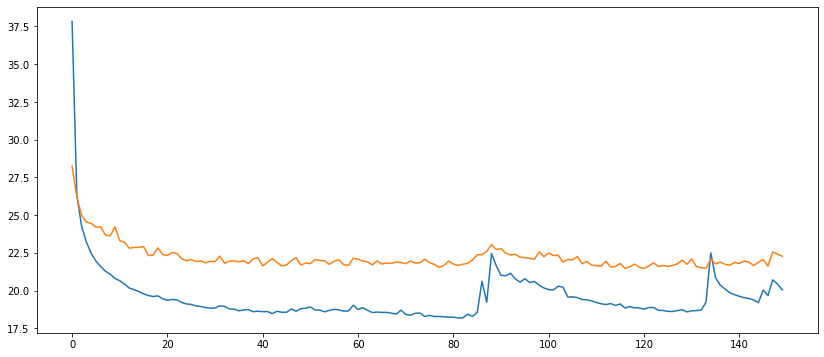

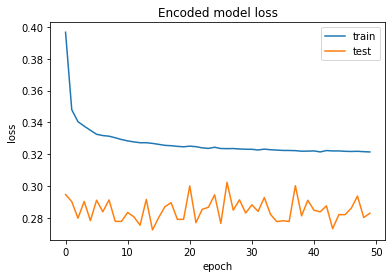

Overall accuracy of Convolutional Neural Network model: 0.8677108789078959


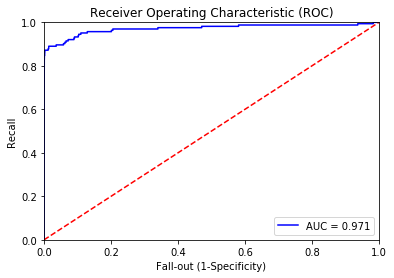

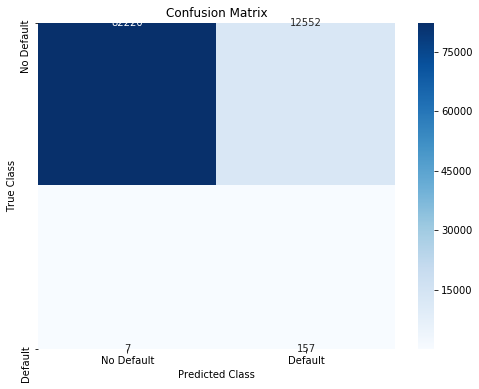

AUC(ROC): 0.9124364456724381
Precision: 0.012353450310803368
Recall: 0.9573170731707317
F1 score: 0.024392138584634508
False positives: 12552
True positives: 157
False negatives: 7
True negatives: 82220
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379091, 30)
After OverSampling, the shape of train_y: (379091,) 

After OverSampling, counts of label '1': 189547
After OverSampling, counts of label '0': 189544
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

379091/379091 [==============================] - 24s 63us/step - loss: 12.3228 - rec_loss: 19.6607 - kl_loss: 4.0557 - val_loss: 13.4647 - val_rec_loss: 23.5798 - val_kl_loss: 2.8278
Epoch 17/150
379091/379091 [==============================] - 24s 63us/step - loss: 12.3696 - rec_loss: 19.7605 - kl_loss: 4.0551 - val_loss: 13.2149 - val_rec_loss: 23.0702 - val_kl_loss: 2.8496
Epoch 18/150
379091/379091 [==============================] - 24s 64us/step - loss: 12.2003 - rec_loss: 19.4237 - kl_loss: 4.0771 - val_loss: 13.2530 - val_rec_loss: 23.1328 - val_kl_loss: 2.8676
Epoch 19/150
379091/379091 [==============================] - 24s 63us/step - loss: 12.1627 - rec_loss: 19.3586 - kl_loss: 4.0865 - val_loss: 13.3111 - val_rec_loss: 23.2452 - val_kl_loss: 2.8882
Epoch 20/150
379091/379091 [==============================] - 24s 63us/step - loss: 12.1345 - rec_loss: 19.3224 - kl_loss: 4.0838 - val_loss: 13.1907 - val_rec_loss: 22.9634 - val_kl_loss: 2.9300
Epoch 21/150
379091/379091 [=====

379091/379091 [==============================] - 22s 59us/step - loss: 11.5827 - rec_loss: 18.1710 - kl_loss: 4.2094 - val_loss: 12.8804 - val_rec_loss: 22.1992 - val_kl_loss: 3.0989
Epoch 58/150
379091/379091 [==============================] - 22s 59us/step - loss: 11.5112 - rec_loss: 18.0486 - kl_loss: 4.2005 - val_loss: 12.7489 - val_rec_loss: 22.0132 - val_kl_loss: 3.0322
Epoch 59/150
379091/379091 [==============================] - 23s 59us/step - loss: 11.4875 - rec_loss: 17.9988 - kl_loss: 4.2000 - val_loss: 12.6366 - val_rec_loss: 21.7716 - val_kl_loss: 3.0495
Epoch 60/150
379091/379091 [==============================] - 22s 59us/step - loss: 11.4731 - rec_loss: 17.9618 - kl_loss: 4.2055 - val_loss: 12.7328 - val_rec_loss: 21.8938 - val_kl_loss: 3.1257
Epoch 61/150
379091/379091 [==============================] - 22s 59us/step - loss: 11.5316 - rec_loss: 18.0770 - kl_loss: 4.2055 - val_loss: 12.6099 - val_rec_loss: 21.6838 - val_kl_loss: 3.0578
Epoch 62/150
379091/379091 [=====

Epoch 99/150
379091/379091 [==============================] - 24s 63us/step - loss: 11.8137 - rec_loss: 18.5413 - kl_loss: 4.2304 - val_loss: 12.8503 - val_rec_loss: 22.0811 - val_kl_loss: 3.1377
Epoch 100/150
379091/379091 [==============================] - 23s 61us/step - loss: 11.7974 - rec_loss: 18.4967 - kl_loss: 4.2358 - val_loss: 12.6188 - val_rec_loss: 21.7274 - val_kl_loss: 3.0209
Epoch 101/150
379091/379091 [==============================] - 24s 62us/step - loss: 11.7739 - rec_loss: 18.4701 - kl_loss: 4.2199 - val_loss: 12.7602 - val_rec_loss: 21.7948 - val_kl_loss: 3.2269
Epoch 102/150
379091/379091 [==============================] - 23s 62us/step - loss: 11.7817 - rec_loss: 18.4698 - kl_loss: 4.2365 - val_loss: 12.7006 - val_rec_loss: 21.7818 - val_kl_loss: 3.1381
Epoch 103/150
379091/379091 [==============================] - 24s 62us/step - loss: 11.7236 - rec_loss: 18.3614 - kl_loss: 4.2328 - val_loss: 12.8407 - val_rec_loss: 22.1311 - val_kl_loss: 3.0714
Epoch 104/150
37

379091/379091 [==============================] - 24s 63us/step - loss: 12.0015 - rec_loss: 18.5901 - kl_loss: 4.2958 - val_loss: 13.1173 - val_rec_loss: 21.9833 - val_kl_loss: 3.4083
Epoch 141/150
379091/379091 [==============================] - 23s 61us/step - loss: 12.1941 - rec_loss: 18.8121 - kl_loss: 4.4215 - val_loss: 13.1143 - val_rec_loss: 22.0362 - val_kl_loss: 3.3577
Epoch 142/150
379091/379091 [==============================] - 23s 62us/step - loss: 12.0103 - rec_loss: 18.5596 - kl_loss: 4.3323 - val_loss: 13.0291 - val_rec_loss: 22.0408 - val_kl_loss: 3.2220
Epoch 143/150
379091/379091 [==============================] - 23s 61us/step - loss: 11.8158 - rec_loss: 18.3330 - kl_loss: 4.2477 - val_loss: 12.7857 - val_rec_loss: 21.9131 - val_kl_loss: 3.0187
Epoch 144/150
379091/379091 [==============================] - 23s 61us/step - loss: 11.8834 - rec_loss: 18.5927 - kl_loss: 4.1907 - val_loss: 12.7941 - val_rec_loss: 21.8267 - val_kl_loss: 3.1329
Epoch 145/150
379091/379091 [

379091/379091 [==============================] - 84s 222us/step - loss: 0.3481 - accuracy: 0.8504 - val_loss: 0.2844 - val_accuracy: 0.8812
Epoch 41/50
379091/379091 [==============================] - 84s 222us/step - loss: 0.3481 - accuracy: 0.8506 - val_loss: 0.2929 - val_accuracy: 0.8830
Epoch 42/50
379091/379091 [==============================] - 83s 220us/step - loss: 0.3476 - accuracy: 0.8504 - val_loss: 0.2925 - val_accuracy: 0.8787
Epoch 43/50
379091/379091 [==============================] - 83s 219us/step - loss: 0.3474 - accuracy: 0.8509 - val_loss: 0.2953 - val_accuracy: 0.8767
Epoch 44/50
379091/379091 [==============================] - 83s 220us/step - loss: 0.3471 - accuracy: 0.8510 - val_loss: 0.2939 - val_accuracy: 0.8797
Epoch 45/50
379091/379091 [==============================] - 84s 220us/step - loss: 0.3474 - accuracy: 0.8507 - val_loss: 0.2880 - val_accuracy: 0.8829
Epoch 46/50
379091/379091 [==============================] - 84s 221us/step - loss: 0.3472 - accurac

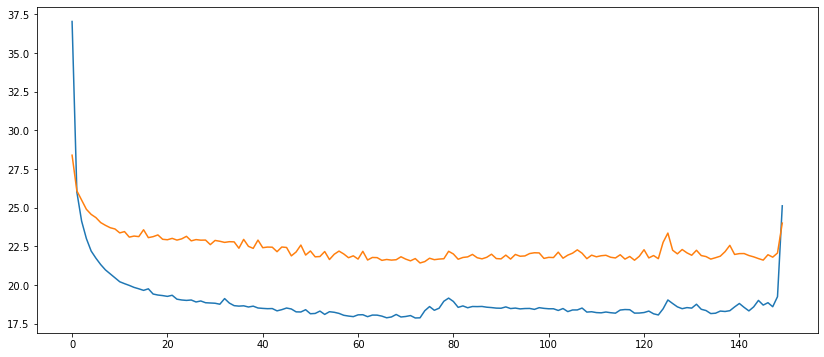

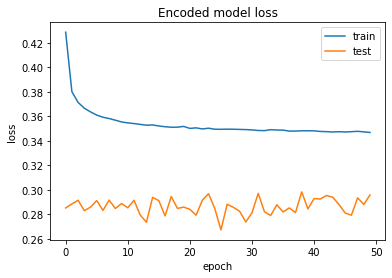

Overall accuracy of Convolutional Neural Network model: 0.8771791225575394


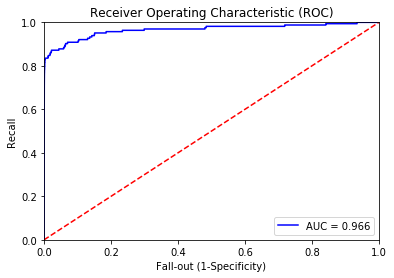

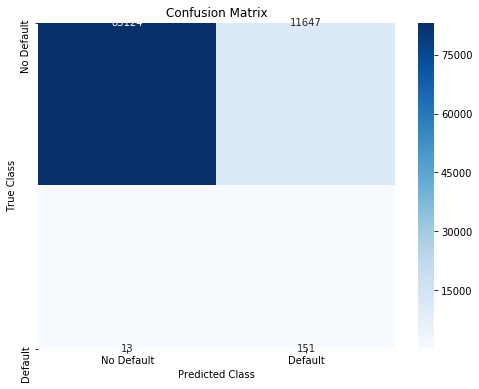

AUC(ROC): 0.8989177313426384
Precision: 0.01279877945414477
Recall: 0.9207317073170732
F1 score: 0.025246614278548737
False positives: 11647
True positives: 151
False negatives: 13
True negatives: 83124


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 83004.33333333333
Average fp = 11767.333333333334
Average fn = 10.666666666666666
Average tp = 153.33333333333334
Average Precision = 1.29%
Average Recall = 93.50%
Average F1 score = 2.54%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 249013
Total fp: 35302
 Total fn:32
 Total tp:460
Total Precision = 0.01286281527878754
Total Recall = 0.9349593495934959
Total F1_score = 0.025376510178187234
